In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *

# set the random number generator
np.random.seed(7)

# If this cell runs successfully, it produces no output.

In [7]:
bikeshare = State(olin=10, wellesley=2)

,values
olin,10
wellesley,2


In [3]:
bikeshare.olin

10

In [8]:
bikeshare.wellesley

2

In [9]:
bikeshare.olin -= 1

In [10]:
bikeshare

,values
olin,9
wellesley,2


In [11]:
bikeshare.wellesley += 1
bikeshare

,values
olin,9
wellesley,3


In [12]:
def bike_to_wellesley():
    bikeshare.olin -= 1
    bikeshare.wellesley += 1

In [13]:
bike_to_wellesley()
bikeshare

,values
olin,8
wellesley,4


In [15]:
def bike_to_olin():
    bikeshare.wellesley -= 1
    bikeshare.olin += 1


In [16]:
bike_to_olin()
bikeshare

,values
olin,9
wellesley,3


In [17]:
help(flip)

Help on function flip in module modsim.modsim:

flip(p=0.5)
    Flips a coin with the given probability.
    
    p: float 0-1
    
    returns: boolean (True or False)



In [19]:
flip(0.7)

False

In [20]:
if flip(0.7):
    print('heads')

heads


In [21]:
if flip(0.7):
    print('heads')
else:
    print('tails')

tails


In [22]:
bikeshare = State(olin=10, wellesley=2)

,values
olin,10
wellesley,2


In [23]:
if flip(0.5):
    bike_to_wellesley()
    print('Moving a bike to Wellesley')

bikeshare

,values
olin,10
wellesley,2


In [24]:
if flip(0.4):
    bike_to_olin()
    print('Moving a bike to Olin')

bikeshare

,values
olin,10
wellesley,2


In [25]:
def step():
    if flip(0.5):
        bike_to_wellesley()
        print('Moving a bike to Wellesley')
        
    if flip(0.4):
        bike_to_olin()
        print('Moving a bike to Olin')

In [26]:
step()
bikeshare

Moving a bike to Olin


,values
olin,11
wellesley,1


In [27]:
def step(p1, p2):
    if flip(p1):
        bike_to_wellesley()
        print('Moving a bike to Wellesley')
        
    if flip(p2):
        bike_to_olin()
        print('Moving a bike to Olin')
        

In [28]:
step(0.5, 0.4)
bikeshare

Moving a bike to Wellesley


,values
olin,10
wellesley,2


In [29]:
step(0.3, 0.2)
bikeshare

,values
olin,10
wellesley,2


In [30]:
def step(p1, p2):
    if flip(p1):
        bike_to_wellesley()
    
    if flip(p2):
        bike_to_olin()

In [31]:
bikeshare = State(olin=10, wellesley=2)

,values
olin,10
wellesley,2


In [32]:
for i in range(4):
    bike_to_wellesley()
    
bikeshare

,values
olin,6
wellesley,6


In [33]:
for i in range(4):
    step(0.3, 0.2)
    
bikeshare

,values
olin,6
wellesley,6


In [34]:
for i in range(60):
    step(0.3, 0.2)

bikeshare

,values
olin,-2
wellesley,14


In [35]:
results = TimeSeries()

,values


In [36]:
results[0] = bikeshare.olin
results

,values
0,-2


In [37]:
bikeshare = State(olin=10, wellesley=2)

,values
olin,10
wellesley,2


In [38]:
for i in range(10):
    step(0.3, 0.2)
    results[i] = bikeshare.olin

In [39]:
results

,values
0,11
1,10
2,11
3,10
4,10
5,9
6,9
7,8
8,8
9,8


In [40]:
results.mean()

9.4

In [41]:
results.describe()

count    10.000000
mean      9.400000
std       1.173788
min       8.000000
25%       8.250000
50%       9.500000
75%      10.000000
max      11.000000
dtype: float64

Saving figure to file Documents/chap02-fig01.pdf


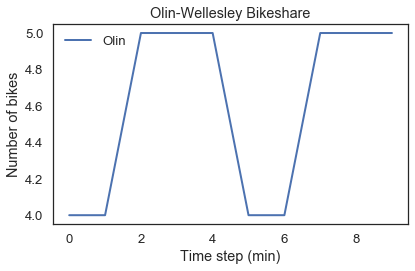

In [62]:
plot(results, label='Olin')

decorate(title='Olin-Wellesley Bikeshare',
         xlabel='Time step (min)', 
         ylabel='Number of bikes')

savefig('Documents/chap02-fig01.pdf')

In [43]:
help(decorate)

Help on function decorate in module modsim.modsim:

decorate(**options)
    Decorate the current axes.
    
    Call decorate with keyword arguments like
    
    decorate(title='Title',
             xlabel='x',
             ylabel='y')
    
    The keyword arguments can be any of the axis properties
    
    https://matplotlib.org/api/axes_api.html
    
    In addition, you can use `legend=False` to suppress the legend.
    
    And you can use `loc` to indicate the location of the legend
    (the default value is 'best')



In [44]:
help(savefig)

Help on function savefig in module modsim.modsim:

savefig(filename, **options)
    Save the current figure.
    
    Keyword arguments are passed along to plt.savefig
    
    https://matplotlib.org/api/_as_gen/matplotlib.pyplot.savefig.html
    
    filename: string



Saving figure to file Documents/chap02-fig02.pdf


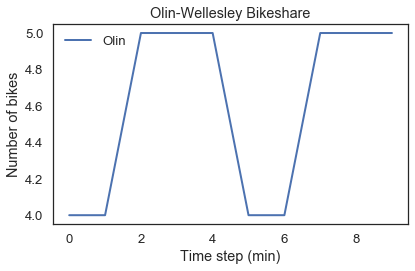

In [60]:
def run_simulation(p1,p2,num_steps):
    results = TimeSeries() 
    for i in range(num_steps):
        step(p1,p2)
        
        results[i] = bikeshare.olin
        
run_simulation(0.3,0.2, 10)
bikeshare

plot(results, label='Olin')

decorate(title='Olin-Wellesley Bikeshare',
         xlabel='Time step (min)', 
         ylabel='Number of bikes')

savefig('Documents/chap02-fig02.pdf')
    

Saving figure to file Documents/chap02-fig03.pdf


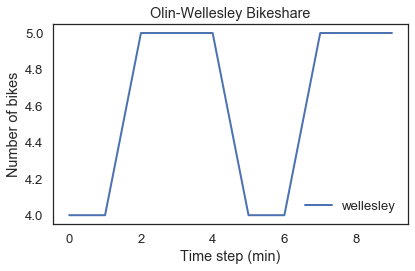

In [61]:
def run_simulation(p1,p2,num_steps):
    results = TimeSeries() 
    for i in range(num_steps):
        step(p1,p2)
        
        results[i] = bikeshare.wellesley
        
run_simulation(0.3,0.2, 10)
bikeshare

plot(results, label='wellesley')

decorate(title='Olin-Wellesley Bikeshare',
         xlabel='Time step (min)', 
         ylabel='Number of bikes')

savefig('Documents/chap02-fig03.pdf')
    

In [53]:
help(decorate)

Help on function decorate in module modsim.modsim:

decorate(**options)
    Decorate the current axes.
    
    Call decorate with keyword arguments like
    
    decorate(title='Title',
             xlabel='x',
             ylabel='y')
    
    The keyword arguments can be any of the axis properties
    
    https://matplotlib.org/api/axes_api.html
    
    In addition, you can use `legend=False` to suppress the legend.
    
    And you can use `loc` to indicate the location of the legend
    (the default value is 'best')



In [54]:
source_code(flip)

def flip(p=0.5):
    """Flips a coin with the given probability.

    p: float 0-1

    returns: boolean (True or False)
    """
    return np.random.random() < p

